In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, KFold, train_test_split, StratifiedShuffleSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [ ]:
def get_scores(y_true, y_pred, classifier_name):
    result = pd.DataFrame()
    result["Classifier"] = [classifier_name]
    result["Accuracy"] = [accuracy_score(y_true, y_pred)]
    result["F1-Score (Macro)"] = [f1_score(y_true, y_pred, average="macro")]
    result["Precision  (Macro)"] = [precision_score(y_true, y_pred, average="macro")]
    result["Recall  (Macro)"] = [recall_score(y_true, y_pred, average="macro")]
    result["F1-Score (Micro)"] = [f1_score(y_true, y_pred, average="micro")]
    result["Precision  (Micro)"] = [precision_score(y_true, y_pred, average="micro")]
    result["Recall  (Micro)"] = [recall_score(y_true, y_pred, average="micro")]
    result["F1-Score (Weighted)"] = [f1_score(y_true, y_pred, average="weighted")]
    result["Precision  (Weighted)"] = [precision_score(y_true, y_pred, average="weighted")]
    result["Recall  (Weighted)"] = [recall_score(y_true, y_pred, average="weighted")]

    return result

# Load Data

In [ ]:
train = pd.read_csv("train.csv", index_col=None)

test = pd.read_csv("test.csv", index_col=None)

# Split Train/Val

In [ ]:
X_train=train.iloc[:,:-3]
y_train=train["Label"]
X_test=test.iloc[:,:-3]
y_test=test["Label"]

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7352, 561) (7352,) (2947, 561) (2947,)


# Validation

In [ ]:
kernel_list=["linear", "poly", "rbf","sigmoid"]
C_list=[0.001,0.01,0.1,1,10,100]
param_grid = dict(kernel=kernel_list, C=C_list)

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv, verbose=3)
grid.fit(X_train, y_train)

print(grid.best_params_, grid.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END ............C=0.001, kernel=linear;, score=0.920 total time=   5.9s
[CV 2/3] END ............C=0.001, kernel=linear;, score=0.911 total time=   5.8s
[CV 3/3] END ............C=0.001, kernel=linear;, score=0.903 total time=   5.7s
[CV 1/3] END ..............C=0.001, kernel=poly;, score=0.549 total time=  12.7s
[CV 2/3] END ..............C=0.001, kernel=poly;, score=0.547 total time=  12.9s
[CV 3/3] END ..............C=0.001, kernel=poly;, score=0.542 total time=  12.6s
[CV 1/3] END ...............C=0.001, kernel=rbf;, score=0.192 total time=  24.1s
[CV 2/3] END ...............C=0.001, kernel=rbf;, score=0.192 total time=  24.3s
[CV 3/3] END ...............C=0.001, kernel=rbf;, score=0.192 total time=  23.6s
[CV 1/3] END ...........C=0.001, kernel=sigmoid;, score=0.192 total time=  22.1s
[CV 2/3] END ...........C=0.001, kernel=sigmoid;, score=0.192 total time=  22.1s
[CV 3/3] END ...........C=0.001, kernel=sigmoid;

In [ ]:
C_range = np.logspace(-2, 10, 5)
gamma_range = np.logspace(-9, 3, 5)
param_grid = dict(gamma=gamma_range, C=C_range)

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv, verbose=3)
grid.fit(X_train, y_train)

print(grid.best_params_, grid.best_score_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ...............C=0.01, gamma=1e-09;, score=0.192 total time=  23.9s
[CV 2/3] END ...............C=0.01, gamma=1e-09;, score=0.192 total time=  23.3s
[CV 3/3] END ...............C=0.01, gamma=1e-09;, score=0.192 total time=  22.9s
[CV 1/3] END ...............C=0.01, gamma=1e-06;, score=0.192 total time=  23.1s
[CV 2/3] END ...............C=0.01, gamma=1e-06;, score=0.192 total time=  23.8s
[CV 3/3] END ...............C=0.01, gamma=1e-06;, score=0.192 total time=  22.6s
[CV 1/3] END ...............C=0.01, gamma=0.001;, score=0.357 total time=  21.5s
[CV 2/3] END ...............C=0.01, gamma=0.001;, score=0.357 total time=  23.1s
[CV 3/3] END ...............C=0.01, gamma=0.001;, score=0.357 total time=  22.8s
[CV 1/3] END .................C=0.01, gamma=1.0;, score=0.192 total time=  26.7s
[CV 2/3] END .................C=0.01, gamma=1.0;, score=0.192 total time=  28.4s
[CV 3/3] END .................C=0.01, gamma=1.0;

# Prediction & Performance

In [ ]:
svm = SVC(random_state=42, C=10000.0, gamma= 0.001, kernel="rbf")
svm.fit(X_train, y_train) 
y_pred = svm.predict(X_test)
get_scores(y_test, y_pred, "SVM")

,Classifier,Accuracy,F1-Score (Macro),Precision (Macro),Recall (Macro),F1-Score (Micro),Precision (Micro),Recall (Micro),F1-Score (Weighted),Precision (Weighted),Recall (Weighted)
0,SVM,0.96946,0.969412,0.970864,0.968726,0.96946,0.96946,0.96946,0.9694,0.970116,0.96946


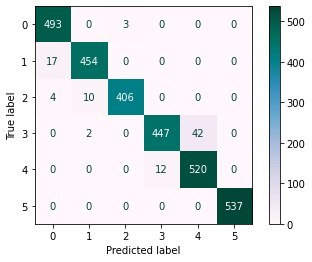

In [ ]:
conf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

# With Feature Selection

In [ ]:
selector = SelectFromModel(estimator=LogisticRegression(max_iter=10000)).fit(X_train, y_train)

In [ ]:
selector.threshold_

0.9650203508155041

In [ ]:
X_new_train=selector.transform(X_train)
X_new_test=selector.transform(X_test)

In [ ]:
X_new_train.shape

(7352, 190)

In [ ]:
svm = SVC(random_state=42, C=10000.0, gamma= 0.001, kernel="rbf") 
svm.fit(X_new_train, y_train) 
y_pred = svm.predict(X_new_test)
get_scores(y_test, y_pred, "SVM")

,Classifier,Accuracy,F1-Score (Macro),Precision (Macro),Recall (Macro),F1-Score (Micro),Precision (Micro),Recall (Micro),F1-Score (Weighted),Precision (Weighted),Recall (Weighted)
0,SVM,0.966067,0.965865,0.967314,0.965273,0.966067,0.966067,0.966067,0.965986,0.966782,0.966067


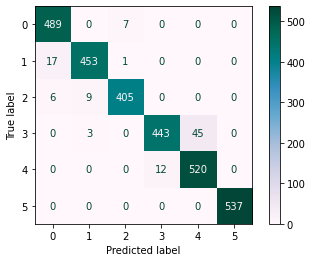

In [ ]:
conf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)